# Potential Outcomes and RCTs

# Multiconilearity

Multicollinearity occurs when in a matrix $X_{nxk}$ where $n \geq k$ and one or more of the k columns of the matrix can be expressed as a linear combination of the other columns. Then, that matrix $X$ is incomplete rank of columns because the rank is less than $k$.

In that sense there is redundancy in the variables.

$
y_i = \beta_1 +\beta_2 x_1i +\beta_3 x_2i + \beta_1 x_3i            ; i=1,2,3,4,5
$

The matrix x is (nx3) 
$$\begin{bmatrix} x_{1,1} & x_{2,1} & x_{3,1} \\ x_1,2 & x_2,2 & x_3,2 \\ x_1,3 & x_2,3 & x_3,3 \\ x_1,4 & x_2,4 & x_3,4 \\ x_1,5 & x_2,5 & x_3,5\end{bmatrix}$$


Edad - Educación - 6





x_{3,1} =  x_{1,1} + x_{2,1} -6

x_{3,2} = x_{1,2} + x_{2,2} -6

... ...

x_{1,5} = x_{2,5} +x_{3,5} -6

Therefore, in this regression there is a multicollinearity problem, since the variables are perfectly correlated (for example x_3i with the others)

## Create Matrix

In [37]:
gen_exact_collin_data = function(num_samples = 10) {
  v1 = rnorm(n = num_samples, mean = 80, sd = 10)
  v2 = rnorm(n = num_samples, mean = 70, sd = 5)
  v3 = rnorm(n = num_samples, mean = 50, sd = 5)
  v4 = rnorm(n = num_samples, mean = 40, sd = 15)
  v5 = rnorm(n = num_samples, mean = 40, sd = 15)
  v6 = rnorm(n = num_samples, mean = 90, sd = 25)
  v7 = rnorm(n = num_samples, mean = 80, sd = 10)
  v8 = rnorm(n = num_samples, mean = 30, sd = 5)
  v9 = rnorm(n = num_samples, mean = 45, sd = 10)  
  y = 3 + 2*v1 + 3*v2 + 5*v3 + 4*v4 +rnorm(n = num_samples, mean = 0, sd = 1)
  data.frame(v1, v2, v3, v4, v5, v6, v7, v8, v9, y)
}

In [38]:
set.seed(123)
exact_collin_data = gen_exact_collin_data()
dim(exact_collin_data)

[1] 10 10

In [39]:
X <- matrix(exact_collin_data)

In [40]:
X <- exact_collin_data[, -which(names(exact_collin_data) == "y")]

In [41]:
head(X)

,v1,v2,v3,v4,v5,v6,v7,v8,v9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.39524,76.12041,44.66088,46.39696,29.57940,96.33296,83.79639,27.54484,45.05764
2,77.69823,71.79907,48.91013,35.57393,36.88124,89.28633,74.97677,18.45416,48.85280
3,95.58708,72.00386,44.86998,53.42688,21.01905,88.92824,76.66793,35.02869,41.29340
4,80.70508,70.55341,46.35554,53.17200,72.53434,124.21506,69.81425,26.45400,51.44377
5,81.29288,67.22079,46.87480,52.32372,58.11943,84.35573,69.28209,26.55996,42.79513
6,97.15065,78.93457,41.56653,50.32960,23.15337,127.91177,83.03529,35.12786,48.31782


In [42]:
Inv_X <- solve(X)
Inv_X

ERROR: Error in solve.default(X): 'a' (10 x 9) debe ser cuadrada


<img src="C:\Users\ANA\Downloads\Phy.jpg">

R shows us an error message because vector 10 of X is a linear combination of vector 1,2, 3 and 4. This, obviously, will show us that X is a singular matrix, that is, that it has a 0 determinant, so it is not invertible. 
However, Python can show us the inverse matrix of X even if one of its vectors is a linear combination of others and the reason why is because there's a difference in packages betwen R and python. The former one has statical packages that can aproximate an inverse matrix even in these scenarios.

## Analyzing RCT data with Precision Adjustment

### Data

In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data. This time, we will focus on the treatment number 2.
  

In [3]:
## loading the data
Penn <- as.data.frame(read.table("../../data/penn_jae.dat", header=T ))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)

In [4]:
T2<- (tg==2)
summary(T2)

   Mode   FALSE    TRUE 
logical    3354    2428 

In [5]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0


In [4]:
#summarize variables 
#summary(Penn)

## Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

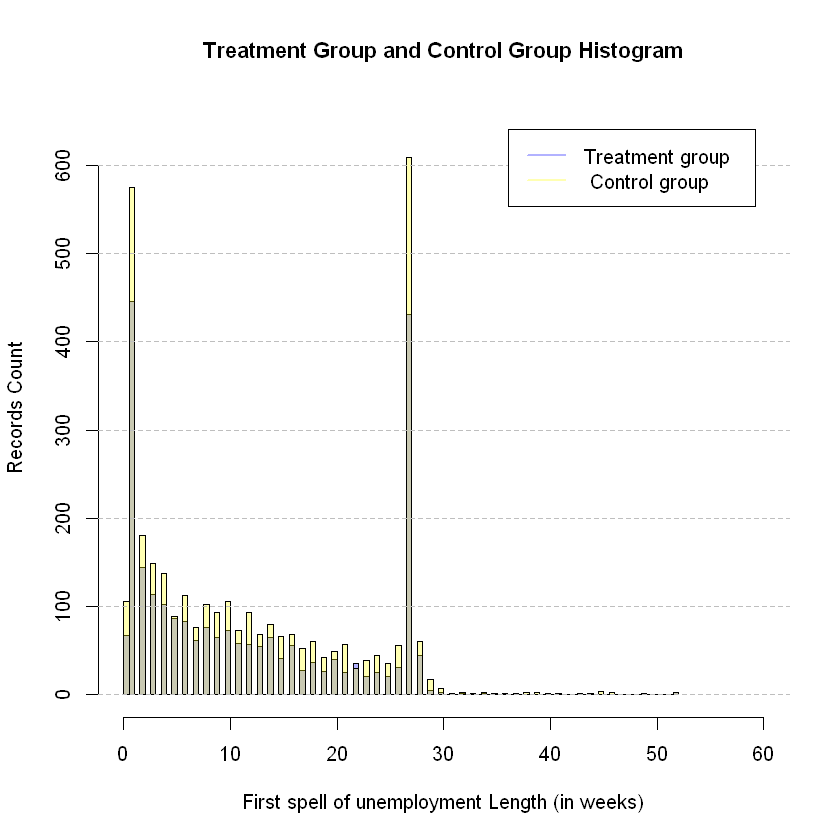

In [9]:
c1 <- rgb(0, 0, 1, 0.3) 
c2 <- rgb(1, 1, 0, 0.3)

hist(Penn$inuidur2[Penn$tg==2],ylim=c(0,650),xlim=c(0,60),xlab="First spell of unemployment Length (in weeks)"
     ,ylab="Records Count",col=c1,cex.main = 1.1,breaks=80, 
     main = "Treatment Group and Control Group Histogram")
hist(Penn$inuidur2[Penn$tg==0],breaks=80,add=T,col=c2)
grid(nx = NA, ny = NULL, lty = 2, col = "gray", lwd = 1)
legend("topright",
       inset = 0.05,
       legend = c("Treatment group", " Control group"),
       lty = c(1, 1),
       col = c(c1, c2),
       lwd = 2)

As seen on on the graph, the distribution of the treatment and control group is very similar, thought the control group normally has a number of weeks of the first spell of unemployment smaller than the treatment group that could be explained because it has more observations than the treatment group.

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL)
*  classical linear regression adjustment (CRA)
*  interactive regression adjusment (IRA)
* interactive regression adjustment (IRA) using Lasso

and carry out robust inference using the *estimatr* R packages. 

# Carry out covariate balance check

This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [5]:
#install.packages("lmtest")
#install.packages("sandwich")

library(lmtest)
library(sandwich)

Warning message:
"package 'lmtest' was built under R version 4.1.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.1.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'sandwich' was built under R version 4.1.3"


In [6]:
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)

coeftest(m, vcov = vcovHC(m, type="HC1"))


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

In [7]:
# get same dataframe

X <- as.data.frame( model.matrix(m) )

no_col <- attributes(m$coefficients)$names[is.na(m$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../../data/m_reg_3.RData")

# Model Specification

### Classical 2-sample approach, no adjustment (CL) & classical linear regression adjustment (CRA)

In [9]:
# model specifications


# no adjustment (2-sample approach)
formula_cl <- log(inuidur1)~T2

# adding controls

formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2

# Omitted dummies: q1, nondurable, muld


ols.cl_reg <- lm(formula_cl)

#Classical linear regression adjustment (CRA)
ols.cra_reg <- lm(formula_cra)


ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1"))
ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))



In [10]:
#No adjustment (2-sample approach)
print(ols.cl)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [11]:
#Classical linear regression adjustment (CRA)
print(ols.cra)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5                   -0.1777168  0.3598757 -0.4938 0.6214465    
q6                   -0.4456044  0.3612792 -1.2334 0.2174749    
agelt35              -0.3264815  0.3108711 -1.0502 0.2936639    
agegt54              -0.1551504  0.4796700 -0.3235 0.7463646    

In [14]:
# get same dataframe for ols.cl

X <- as.data.frame( model.matrix(ols.cl_reg) )

no_col <- attributes(ols.cl_reg$coefficients)$names[is.na(ols.cl_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]


save( X1, file = "../../data/ols_cl_reg_3.RData")


In [15]:
# get same dataframe for ols.cra

X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)$names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]


save( X1, file = "../../data/ols_cra_reg_3.RData")

### Interactive regression model

In [16]:
# interactive regression model variables 

X <- model.matrix(~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1] #without intercept

dim (X)


[1] 5782  119

The interactive specificaiton corresponds to the approach introduced in Lin (2013).

In [17]:
#interactive regression model

demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)

ols.ira_reg = lm(log(inuidur1) ~ T2*X) 
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
print(ols.ira)





t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [18]:
# get same dataframe for ols.ira
S <- as.data.frame( model.matrix(ols.ira_reg) )

no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]

save( S1, file = "../../data/ols_ira_reg_3.RData")



### Interactive regression adjustment using Lasso

In [20]:
T2 = demean(T2)
DX = model.matrix(~T2*X)[,-1]
head(DX)

,T2,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,...,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
1,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
2,0.5800761,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,-0.2632307,...,0,-0.04263790,0.50322755,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
3,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
4,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
5,0.5800761,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,-0.04263790,-0.07684855,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
6,-0.4199239,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,-0.412007661,-0.4062702,0.01162017,-0.39682881,0.01220118,0


In [22]:
#install.packages("hdm")
library(hdm)

rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))

# rlassoEffects ( Partialling out )
# index = 1 (T4 treatment )
print(rlasso.ira)



[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [23]:
# getting data
S = as.data.frame(DX)
save( S, file = "../../data/rlasso_ira_reg_3.RData")

### Results

In [25]:
#install.packages("xtable")
library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
tab<- xtable(table, digits=5)
tab

print(tab, type="latex", digits=5)

,CL,CRA,IRA,IRA w Lasso
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


% latex table generated in R 4.1.1 by xtable 1.8-4 package
% Sat Apr 30 02:00:01 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & CL & CRA & IRA & IRA w Lasso \\ 
  \hline
estimate & -0.07883 & -0.07121 & -0.06990 & -0.07457 \\ 
  standard error & 0.03251 & 0.03204 & 0.03208 & 0.03209 \\ 
   \hline
\end{tabular}
\end{table}


Treatment group 4 experiences an average decrease of about $7.3\%$ in the length of unemployment spell.


Observe that regression estimators delivers estimates that are slighly more efficient (lower standard errors) than the simple 2 mean estimator, but essentially all methods have very similar standard errors. We also see the regression estimators offer slightly lower estimates -- these difference occur perhaps to due minor imbalance in the treatment allocation, which the regression estimators try to correct.

From IRA results we also see that there is statistically detectable heterogeneity. Next, we plot and analyze the following effects: 

* T2*female
* T2*black
* T2*agelt35
* T2*factor(dep)1


## Plot the coefficients of a set of variables of number 3

In [30]:
#install.packages("backports")
#install.packages("broom")

In [31]:
#save the coefficients
require(broom)    
coef_ira <- tidy(ols.ira)

head(coef_ira)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.05569765,0.02071377,99.24303478,0.000000e+00
T2TRUE,-0.06990440,0.03207638,-2.17931062,2.935029e-02
Xfemale,-0.66628233,0.40802338,-1.63295136,1.025357e-01
Xblack,-0.86348620,0.29694353,-2.90791384,3.652836e-03
Xothrace,-3.81768810,0.93661926,-4.07602991,4.644776e-05
Xfactor(dep)1,0.03592643,0.64768162,0.05546927,9.557666e-01


In [32]:
#extract the ones we are interested: T2TRUE:Xfemale, T2TRUE:Xblack, T2TRUE:Xagelt35, T2TRUE:Xfactor(dep)1

tablo<- matrix(0, 2, 4)

tablo[1,1]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 2])
tablo[1,2]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 2])
tablo[1,3]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),2])
tablo[1,4]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfactor(dep)1"),2])

tablo[2,1]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 3])
tablo[2,2]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 3])
tablo[2,3]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),3])
tablo[2,4]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfactor(dep)1"),3])

colnames(tablo)<- c( "T2female", "T2black","T2agelt35", "T2factor(dep)1")
rownames(tablo)<- c("estimate", "standard error")
tabo<- xtable(tablo, digits=4)
tabo

print(tabo, type="latex", digits=4)

#summarize the values in a table

,T2female,T2black,T2agelt35,T2factor(dep)1
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,-0.6597505,0.4525570,1.1233199,0.7636025
standard error,0.5498974,0.5103188,0.6374193,0.7854484


% latex table generated in R 4.1.1 by xtable 1.8-4 package
% Sat Apr 30 02:24:40 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & T2female & T2black & T2agelt35 & T2factor(dep)1 \\ 
  \hline
estimate & -0.6598 & 0.4526 & 1.1233 & 0.7636 \\ 
  standard error & 0.5499 & 0.5103 & 0.6374 & 0.7854 \\ 
   \hline
\end{tabular}
\end{table}


In [33]:
coef.vect.o <- c(as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 2]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 2]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),2]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfactor(dep)1"),2]))
coef.vect.o

sd.vect.o <- c(as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 3]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 3]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),3]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),3]))
sd.vect.o

[1] -0.6597505  0.4525570  1.1233199  0.7636025

[1] 0.5498974 0.5103188 0.6374193 0.6374193

Installing package into 'C:/Users/ANA/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependencies 'minqa', 'nloptr', 'lme4', 'abind'




package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'arm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANA\AppData\Local\Temp\RtmpCiWj5D\downloaded_packages


Warning message:
"package 'arm' was built under R version 4.1.3"
Loading required package: MASS

Loading required package: Matrix

Loading required package: lme4

Warning message:
"package 'lme4' was built under R version 4.1.3"

arm (Version 1.12-2, built: 2021-10-15)


Working directory is C:/Users/ANA/Documents/GitHub/ECO224/Labs/replication_3



Attaching package: 'arm'


The following object is masked from 'package:xtable':

    display




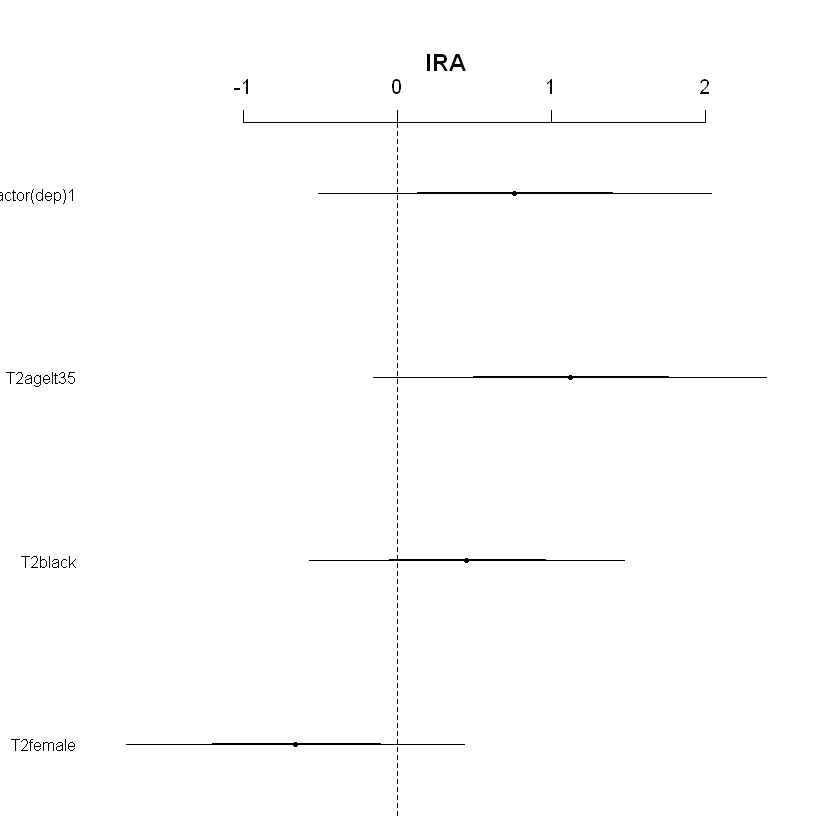

In [35]:
#install.packages("arm")
library(arm)
longnames <- c("T2female", "T2black","T2agelt35", "T2factor(dep)1")
coefplot(coef.vect.o, sd.vect.o, varnames=longnames, main="IRA")

We can see in the graph that all 4 heteregonuos effects are not statiscally significant at 5% and that 0 belongs to the IC. However, T2*agelt35 is statiscally significant at 10%.

Therefore, we can conclude that there is not enough evidence that there was a special effect for the female individuals, the black individuals, the individuals with less than 35 years old, and the individuals with 1 dependents of the treated. 